# Чтение данных

In [35]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

plt.style.use('ggplot')
tqdm.pandas()

In [38]:
sentiment = pd.read_csv('data/sentiment.csv')
sentiment

,Unnamed: 0,MessageID,ChannelID,issuerid,SentimentScore
0,0,241407,1203560567,153,2
1,1,33684,1136626166,230,4
2,2,10090,1063908560,118,4
3,3,9826,1063908560,89,2
4,4,9672,1063908560,160,2
...,...,...,...,...,...
10926,10926,9789,1063908560,225,3
10927,10927,4789,1239405989,127,3
10928,10928,233867,1203560567,127,3
10929,10929,3681,1219484576,127,3


In [40]:
with open('data/sentiment_texts.pickle', 'rb') as f1:
    sentiment_texts = pickle.load(f1)
sentiment_texts

,MessageID,ChannelID,issuerid,SentimentScore,DateAdded,DatePosted,MessageText,IsForward
0,241407,1203560567,153,2,2023-05-12 19:03:20,2023-05-12 19:02:42,⚠️🇷🇺#SELG #дивиденд сд Селигдар: дивиденды 20...,False
1,33684,1136626166,230,4,2023-02-03 20:56:29,2023-02-03 16:46:34,Ozon продолжает развивать специализированные ф...,False
2,10090,1063908560,118,4,2023-06-02 19:18:37,2023-06-02 18:50:00,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...,False
3,10090,1063908560,220,5,2023-06-02 19:18:37,2023-06-02 18:50:00,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...,False
4,9826,1063908560,89,2,2023-04-24 17:51:38,2023-04-24 13:54:00,​​Windfall Tax — налог на сверхприбыль. Какие ...,False
...,...,...,...,...,...,...,...,...
9284,47482,1197210433,157,4,2023-03-20 14:53:14,2023-03-20 12:15:21,#FLOT #Дивиденды 💰 7% — возможная дивдоходност...,False
9285,233829,1203560567,157,4,2023-03-20 14:58:04,2023-03-20 12:05:49,🇷🇺#FLOT #отчетность ЧИСТАЯ ПРИБЫЛЬ СОВКОМФЛОТ...,False
9286,9789,1063908560,225,3,2023-04-19 17:51:56,2023-04-19 15:32:00,​​Ключевой принцип создания портфеля 🔹Диверси...,False
9287,233867,1203560567,127,3,2023-03-20 14:58:04,2023-03-20 14:33:32,"""💥🇷🇺#PLZL #листинг #торги """"Полюс"""" ведет диа...",False


In [41]:
sentiment_texts.describe()

,MessageID,ChannelID,issuerid,SentimentScore,DateAdded,DatePosted
count,9289.000000,9.289000e+03,9289.000000,9289.000000,9289,9289
mean,79271.435892,1.210836e+09,142.522338,3.408978,2023-07-25 01:38:24.586607616,2023-07-24 21:21:38.835396864
min,525.000000,1.001030e+09,4.000000,0.000000,2022-12-26 14:37:23,2022-12-26 13:53:40
25%,6099.000000,1.172556e+09,90.000000,3.000000,2023-04-06 08:51:39,2023-04-06 08:23:13
50%,15383.000000,1.203561e+09,150.000000,3.000000,2023-06-16 13:18:04,2023-06-16 11:03:38
75%,230918.000000,1.239406e+09,223.000000,4.000000,2023-11-13 13:23:17,2023-11-13 09:53:50
max,278484.000000,1.565800e+09,274.000000,5.000000,2024-03-18 10:22:35,2024-03-18 08:08:11
std,104670.429892,1.077680e+08,77.028656,0.926875,NaN,NaN


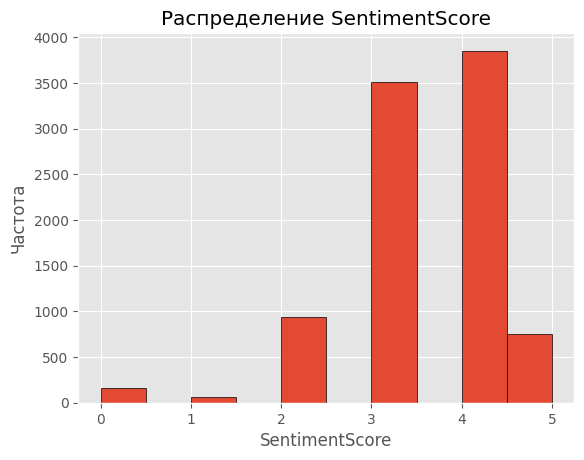

In [42]:
sentiment_scores = sentiment_texts['SentimentScore']

plt.hist(sentiment_scores, bins=10, edgecolor='black')
plt.title('Распределение SentimentScore')
plt.xlabel('SentimentScore')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


# Предобработка - pymorphy2

In [43]:
%pip install pymorphy2

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import pymorphy2
from nltk.corpus import stopwords
import string

morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

def preprocess_text(text):

    tokens = text.split()
    tokens = [word.lower().strip(string.punctuation) for word in tokens]

    lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens if token not in stop_words]
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

In [19]:
tqdm.pandas()
sentiment_texts['PreprocessedText'] = sentiment_texts['MessageText'].progress_apply(preprocess_text)

In [20]:
sentiment_texts.to_csv('preprocessed_sentiment_texts.csv', index=False)

In [21]:
preprocessed_sentiment_texts = pd.read_csv('preprocessed_sentiment_texts.csv')
preprocessed_sentiment_texts['PreprocessedText'] = preprocessed_sentiment_texts['PreprocessedText'].apply(str)
preprocessed_sentiment_texts

,MessageID,ChannelID,issuerid,SentimentScore,DateAdded,DatePosted,MessageText,IsForward,PreprocessedText
0,241407,1203560567,153,2,2023-05-12 19:03:20,2023-05-12 19:02:42,⚠️🇷🇺#SELG #дивиденд сд Селигдар: дивиденды 20...,False,⚠️🇷🇺#selg дивиденд сд селигдар дивиденд 2022г ...
1,33684,1136626166,230,4,2023-02-03 20:56:29,2023-02-03 16:46:34,Ozon продолжает развивать специализированные ф...,False,ozon продолжать развивать специализировать фин...
2,10090,1063908560,118,4,2023-06-02 19:18:37,2023-06-02 18:50:00,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...,False,​фокус продолжаются🔥акция инвестиция 📈втб 5.1 ...
3,10090,1063908560,220,5,2023-06-02 19:18:37,2023-06-02 18:50:00,​Фокусы продолжаются🔥Акции и инвестиции 📈ВТБ ...,False,​фокус продолжаются🔥акция инвестиция 📈втб 5.1 ...
4,9826,1063908560,89,2,2023-04-24 17:51:38,2023-04-24 13:54:00,​​Windfall Tax — налог на сверхприбыль. Какие ...,False,​​windfall tax — налог сверхприбыль какой комп...
...,...,...,...,...,...,...,...,...,...
9284,47482,1197210433,157,4,2023-03-20 14:53:14,2023-03-20 12:15:21,#FLOT #Дивиденды 💰 7% — возможная дивдоходност...,False,flot дивиденд 💰 7 — возможный дивдоходность со...
9285,233829,1203560567,157,4,2023-03-20 14:58:04,2023-03-20 12:05:49,🇷🇺#FLOT #отчетность ЧИСТАЯ ПРИБЫЛЬ СОВКОМФЛОТ...,False,🇷🇺#flot отчётность чистый прибыль совкомфлот м...
9286,9789,1063908560,225,3,2023-04-19 17:51:56,2023-04-19 15:32:00,​​Ключевой принцип создания портфеля 🔹Диверси...,False,​​ключевой принцип создание портфель 🔹диверсиф...
9287,233867,1203560567,127,3,2023-03-20 14:58:04,2023-03-20 14:33:32,"""💥🇷🇺#PLZL #листинг #торги """"Полюс"""" ведет диа...",False,💥🇷🇺#plzl листинг торг полюс вести диалог альте...


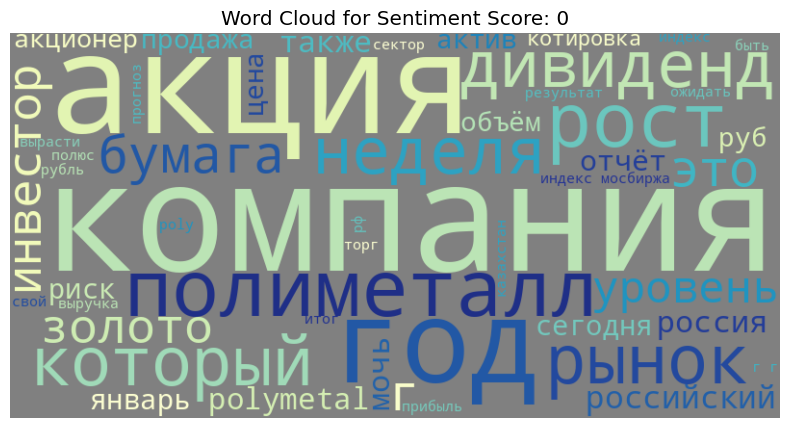

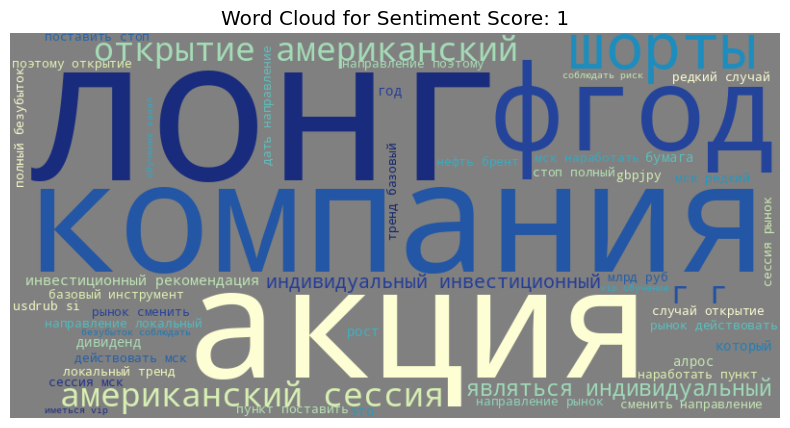

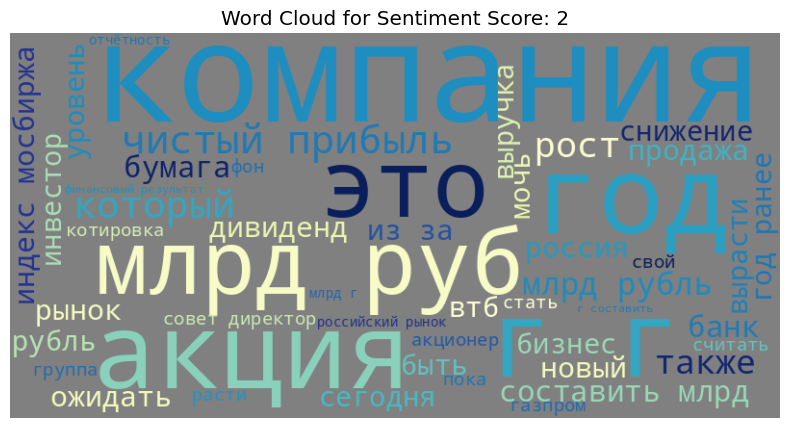

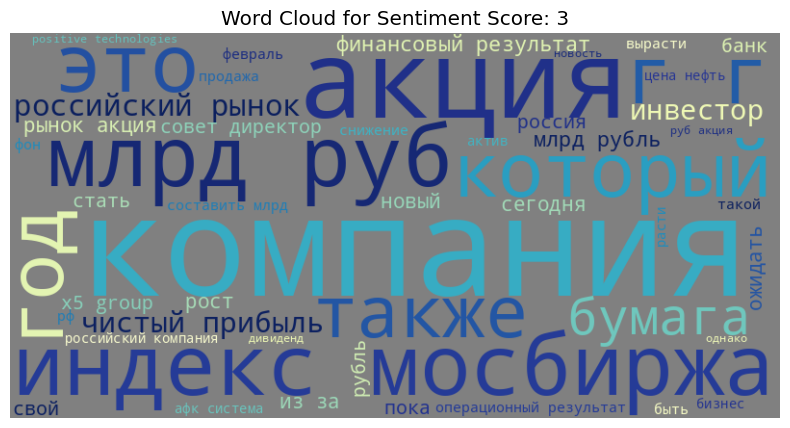

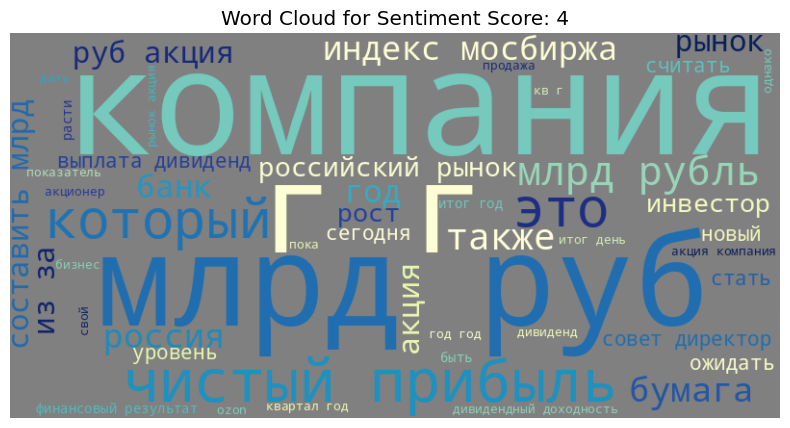

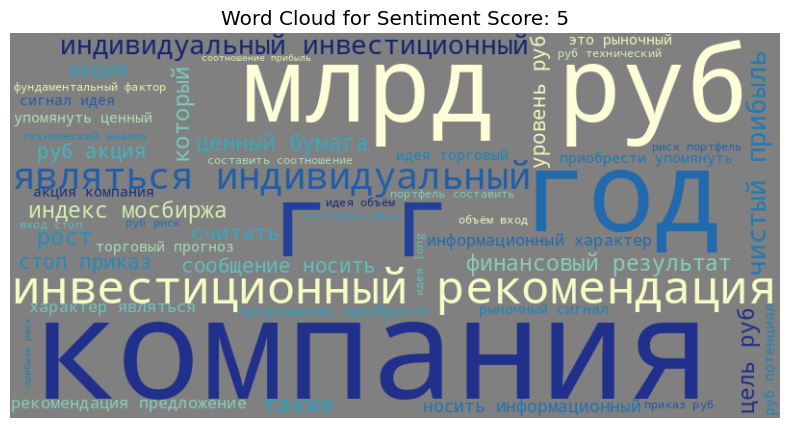

In [32]:
from wordcloud import WordCloud

grouped_texts = preprocessed_sentiment_texts.groupby('SentimentScore')

wordcloud_params = {
    'width': 800,
    'height': 400,
    'background_color': 'grey',
    'max_words': 50,
    'collocations': True,  # Отключение поиска биграмм и триграмм
    'colormap': 'YlGnBu'
}

for score, group in grouped_texts:

    combined_text = ' '.join(group['PreprocessedText'])

    wordcloud = WordCloud(**wordcloud_params).generate(combined_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentiment Score: {score}')
    plt.axis('off')
    plt.show()
    wordcloud.to_file(f'wordcloud{score}.png')


# Evaluation

In [33]:
from sklearn.metrics import accuracy_score, f1_score

def final_score(y_test, y_pred):
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    return (f1 + accuracy) / 2


# TextBlob

In [34]:
from textblob import TextBlob

def get_sentiment_rating(text):
    blob = TextBlob(str(text))
    sentiment = blob.sentiment.polarity

    # Преобразование сентимента из [-1, 1] в [1, 5]
    sentiment_rating = 4 + sentiment * 2
    return sentiment_rating

y_test = preprocessed_sentiment_texts['SentimentScore']
y_pred = np.ceil(preprocessed_sentiment_texts.PreprocessedText.progress_apply(get_sentiment_rating))

print(final_score(y_test, y_pred))


  0%|          | 0/9289 [00:00<?, ?it/s]

0.3260493005626551


# NLTK sentiment

In [16]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import string

sia = SentimentIntensityAnalyzer()

def get_sentiment_rating(text):
    sentiment_score = sia.polarity_scores(str(text))['compound']

    # из [-1, 1] в [1, 5]
    sentiment_rating = 4 + sentiment_score * 2
    return sentiment_rating


y_test = preprocessed_sentiment_texts['SentimentScore']
y_pred = np.ceil(preprocessed_sentiment_texts.MessageText.progress_apply(get_sentiment_rating))
print(final_score(y_test, y_pred))


  0%|          | 0/9289 [00:00<?, ?it/s]

0.32163449415004597


# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = sentiment_texts['MessageText'].apply(str)
y = sentiment_texts['SentimentScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LinearRegression()
model.fit(X_train_tfidf, y_train)

y_pred = np.ceil(model.predict(X_test_tfidf))

print(final_score(y_test, y_pred))


0.4281882577881002


# Эвристики

In [ ]:
tst = sentiment_texts.head(10)
tst['preprocessedMessageText'] = tst['MessageText'].apply(preprocess_text)

<ipython-input-46-b2688f56d51d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tst['preprocessedMessageText'] = tst['MessageText'].apply(preprocess_text)


In [ ]:
from collections import defaultdict

word_sentiment_sum = defaultdict(float)
word_count = defaultdict(int)

for index, message in tst.iterrows():
    text = preprocess_text(message.MessageText)
    sentiment_score = message['SentimentScore']

    unique_words = set(text.split())

    for word in unique_words:
        word_sentiment_sum[word] += sentiment_score
        word_count[word] += 1

word_sentiment_avg = {word: sentiment_sum / word_count[word] for word, sentiment_sum in word_sentiment_sum.items()}
# word_sentiment_avg


# Russian Sentiment Lexicon RuSentiLex

In [ ]:
import pandas as pd

url = "https://www.labinform.ru/pub/rusentilex/rusentilex_2017.txt"

ruSentiLex = pd.read_csv(url, skiprows=18,
                 delimiter=",",
                 header=None,
                 usecols=[0, 3],
                 names=["Word", "Sentiment"],
                 on_bad_lines='skip')

print(ruSentiLex['Sentiment'][ruSentiLex['Word'] == 'падение'])


9185              negative
9186              negative
9187     positive/negative
Name: Sentiment, dtype: object


In [ ]:
print(ruSentiLex['Sentiment'][ruSentiLex['Word'] == 'рост'])

Series([], Name: Sentiment, dtype: object)


In [ ]:
def find_sentiment_words(text, df):
    sentiment_words = []
    for word in text.split():
        row = df[df['Word'] == word]
        if not row.empty:
            first_sentiment = row.iloc[0]['Sentiment']
            if first_sentiment == 'positive':
                sentiment_words.append(1)
            elif first_sentiment == 'negative':
                sentiment_words.append(-1)
    if len(sentiment_words) > 0:
        return sum(sentiment_words) / len(sentiment_words)
    else:
        return 0

tqdm.pandas()
sentiment_texts['SentimentWords'] = sentiment_texts['MessageText'].progress_apply(lambda x: find_sentiment_words(x, ruSentiLex))


  0%|          | 0/9289 [00:00<?, ?it/s]

In [ ]:
sentiment_texts.to_csv('rusent_sentiment_texts.csv', index=False)

In [ ]:
sentiment_texts.describe()

,MessageID,ChannelID,issuerid,SentimentScore,DateAdded,DatePosted,SentimentWords
count,9289.000000,9.289000e+03,9289.000000,9289.000000,9289,9289,9289.0
mean,79271.435892,1.210836e+09,142.522338,3.408978,2023-07-25 01:38:24.586607616,2023-07-24 21:21:38.835396864,0.0
min,525.000000,1.001030e+09,4.000000,0.000000,2022-12-26 14:37:23,2022-12-26 13:53:40,0.0
25%,6099.000000,1.172556e+09,90.000000,3.000000,2023-04-06 08:51:39,2023-04-06 08:23:13,0.0
50%,15383.000000,1.203561e+09,150.000000,3.000000,2023-06-16 13:18:04,2023-06-16 11:03:38,0.0
75%,230918.000000,1.239406e+09,223.000000,4.000000,2023-11-13 13:23:17,2023-11-13 09:53:50,0.0
max,278484.000000,1.565800e+09,274.000000,5.000000,2024-03-18 10:22:35,2024-03-18 08:08:11,0.0
std,104670.429892,1.077680e+08,77.028656,0.926875,NaN,NaN,0.0
